In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
df = pd.read_csv("Manazo_pp_mensual_1991-2020.csv", parse_dates=["Fecha"]) #importar excel con datos diarios
df = df.set_index('Fecha') #formato fecha columna "Fecha"
df.head() 
#df.describe()

,Puno,Granja Salcedo,Los Uros,Rincon de la Cruz,Mañazo,Umayo,Illpa,Capachica,Cabanillas,Lagunillas,Santa Lucia,Juliaca,Isla Taquile,Los Rosales
Fecha,,,,,,,,,,,,,,
1981-01-31,143.871903,143.871903,180.257218,184.572951,175.748671,108.587310,111.159630,231.895677,134.838106,161.558991,137.264527,193.675796,290.980684,130.252671
1981-02-28,213.681076,213.681076,204.995683,185.692015,212.290436,186.720414,194.857791,208.581969,150.306930,206.064436,222.751052,176.351775,291.622864,196.091141
1981-03-31,114.602043,114.602043,148.884612,131.129317,102.911461,110.395036,133.580552,168.578263,165.330870,96.231819,128.927535,191.986939,202.093433,76.936135
1981-04-30,77.018347,77.018347,76.890785,61.300738,69.399109,55.623191,53.746368,65.018120,49.798889,57.277894,60.935963,57.139210,106.761882,58.527732
1981-05-31,2.850581,2.850581,3.519732,3.269830,0.267161,1.589777,1.624628,2.686994,0.006765,0.007922,0.000000,2.164916,8.626355,0.965030


In [4]:
df.index

DatetimeIndex(['1981-01-31', '1981-02-28', '1981-03-31', '1981-04-30',
               '1981-05-31', '1981-06-30', '1981-07-31', '1981-08-31',
               '1981-09-30', '1981-10-31',
               ...
               '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30',
               '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31',
               '2021-04-30', '2021-05-31'],
              dtype='datetime64[ns]', name='Fecha', length=485, freq=None)

In [5]:
#Definir rangos de fechas a filtrar
anos_lluviosos = [1984, 1986, 2001, 2012] #anos mas lluviosos
#definir comienzo y fin 1984
comienzo_1984 = '01-01-1984' 
fin_1984 = '31-12-1984'
#definir comienzo y fin 1986
comienzo_1986 = '01-01-1986'
fin_1986 = '31-12-1986'
#definir comienzo y fin 2001
comienzo_2001 = '01-01-2001'
fin_2001 = '31-12-2001'
#definir comienzo y fin 2012
comienzo_2012 = '01-01-2012'
fin_2012 = '31-12-2012'
#definir mascaras
mask1984 = (df.index >= comienzo_1984) & (df.index <= fin_1984)
mask1986 = (df.index >= comienzo_1986) & (df.index <= fin_1986)
mask2001 = (df.index >= comienzo_2001) & (df.index <= fin_2001)
mask2012 = (df.index >= comienzo_2012) & (df.index <= fin_2012)
#guardar cada ano en df separado
pp_1984 = df.loc[mask1984]
pp_1984.index = pd.date_range('1/1/1984', '12/1/1984', freq='MS').strftime('%B')
pp_1986 = df.loc[mask1986]
pp_1986.index = pd.date_range('1/1/1986', '12/1/1986', freq='MS').strftime('%B')
pp_2001 = df.loc[mask2001]
pp_2001.index = pd.date_range('1/1/2001', '12/1/2001', freq='MS').strftime('%B')
pp_2012 = df.loc[mask2012]
pp_2012.index = pd.date_range('1/1/2012', '12/1/2012', freq='MS').strftime('%B')

<ipython-input-7-e529a543f3e3>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,0].set_xticklabels(labels=pp_2001.index, rotation=45)
<ipython-input-7-e529a543f3e3>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,1].set_xticklabels(labels=pp_2012.index, rotation=45)


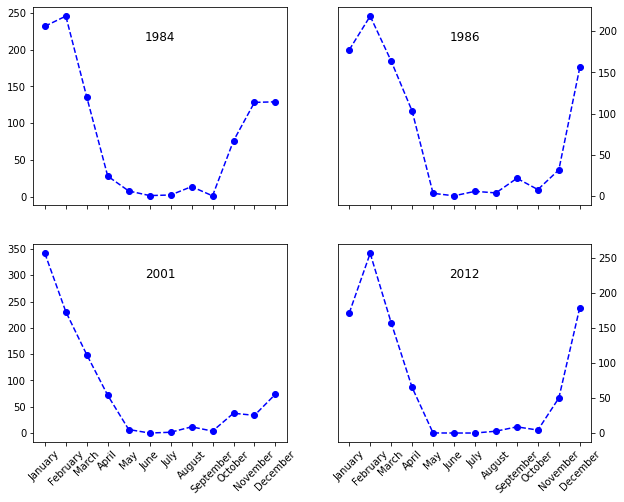

In [7]:
#plotear
fig, axs = plt.subplots(2,2, figsize=(10,8))
axs[0,0].plot(pp_1984.index,
        pp_1984['Mañazo'],
        color="blue",
        linestyle='dashed', marker="o")
axs[0, 0].set_title("1984", x=0.5, y=0.8)
plt.setp(axs[0,0].get_xticklabels(), visible=False)
axs[0,1].plot(pp_1986.index,
        pp_1986['Mañazo'],
        color="blue",
        linestyle='dashed', marker="o")
plt.setp(axs[0,1].get_xticklabels(), visible=False)
axs[0,1].set_title("1986", x=0.5, y=0.8)
axs[0,1].yaxis.set_label_position("right")
axs[0,1].yaxis.tick_right()
axs[1,0].plot(pp_2001.index,
        pp_2001['Mañazo'],
        color="blue",
        linestyle='dashed', marker="o")
axs[1, 0].set_title("2001", x=0.5, y=0.8)
axs[1,0].set_xticklabels(labels=pp_2001.index, rotation=45)
axs[1,1].plot(pp_2012.index,
        pp_2012['Mañazo'],
        color="blue",
        linestyle='dashed', marker="o")
axs[1,1].set_title("2012", x=0.5, y=0.8)
axs[1,1].set_xticklabels(labels=pp_2012.index, rotation=45)
axs[1,1].yaxis.set_label_position("right")
axs[1,1].yaxis.tick_right()



plt.savefig("mensual_anos_lluviosos.png")

plt.show()